# Lesson 6: Plotting Your Data -- Matplotlib

These are some notes for [Data Carpentry](http://www.datacarpentry.org)'s tutorial [*Data Analysis and Visualization in Python*](http://www.datacarpentry.org/python-ecology-lesson/).  The web page for this lesson can be found [here](http://www.datacarpentry.org/python-ecology-lesson/06-plotting-with-matplotlib).

## Goal

> Make basic plots with [`matplotlib`](http://matplotlib.org/)

## Setup

### Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data

Let's first load some data into a DataFrame to plot.

In [2]:
#df = pd.read_csv('https://ndownloader.figshare.com/files/2292172',
#                  index_col='record_id')

df = pd.read_csv('data/surveys.csv')

For **practice** let's just take a **small subset** of the data.

In [3]:
small_dataset = df[:50]

For **simple plots** we want just a **single list** of data.  So let's take **one column**.

In [4]:
plot_data = small_dataset['plot_id']

## Simple Plotting

For a simple plot, we want **`x` vs. `y`**.

Our **`y`-data** is the data in the **`'plot_id'` column**.

What's the **`x`-data**?  It's the **row index**, the `'record_id'` value.

In [5]:
plt.plot(plot_data, label='My Data')

Note there's **no output**.  But the plot is there.  We just need the computer to **show it**.

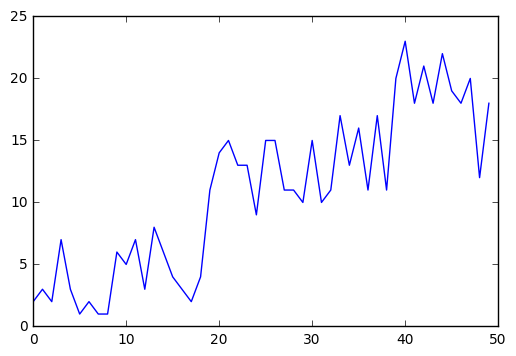

In [6]:
plt.show()

We can also **save the figure**.  The command will **infer the format** from the name, or we can **specify with a keyword**.

In [7]:
plt.plot(plot_data, label='My Data')
plt.savefig('plots/myplot.png') # or use format='png'

## Plot Essentials

### Labels

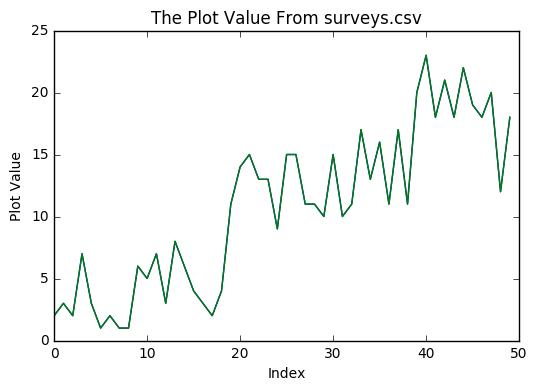

In [8]:
plt.plot(plot_data, label='My Data')
plt.xlabel('Index')
plt.ylabel('Plot Value')
plt.title('The Plot Value From surveys.csv')
plt.show()

### Clearing the Plot

**Subsequent** plots are **superimposed**.

You may want to **get rid of** what you've done so far, perhaps to **change the line color**.

So we need to **clear** the plot.

In [9]:
plt.clf()

But the **memory** is **not cleared** until you say...

In [10]:
plt.close()

## Management

### Figures

**Note to self:** there's absolutely no explanation of the **difference** between **`figure()`** and **`plot()`**.

Not even the [*Pyplot tutorial*](http://matplotlib.org/users/pyplot_tutorial.html) is very clear on the distinction between `figure()` and `plot()`.  But here's the...

**Basic Intuition:**

* All graphics are created **within a `figure()`**;
    * Within a figure we can **`plot()` data**;
        * We can `plot()` **several** times on the same graph;
    * We can create several **`subplot`s** within the same `figure()`;
* We can create several **different `figure`s** within the **same program**
    * and **switch between them** to modify them.

As an example, let's create

* **one `figure`** with
    * **two `subplot`s** in
        * **1 row** with **2 columns**.

In [17]:
# create a figure, call it figure "1"
plt.figure(1)

# add a subplot
plt.subplot(1, 2, 1) # 1 row total, 2 columns total, this is subplot 1

# plot something in the subplot
plt.plot(plot_data, label='Example Subplot')
plt.title('First subplot')

# add another subplot
plt.subplot(1, 2, 2) # 1 row total, 2 columns total, this is subplot 2

# put something in that subplot
plt.plot(plot_data, label='Another Example Subplot')
plt.title('Second subplot')

Meanwhile, let's create a **second `figure`**.

In [18]:
# create a different figure, call it figure "2"
plt.figure(2)
plt.plot(plot_data)
#plt.show()

Now go **back to the first `figure`** and make some **modifications**.

**NB:** if you use `plt.show()`, then you can't go back to an earlier `figure`.

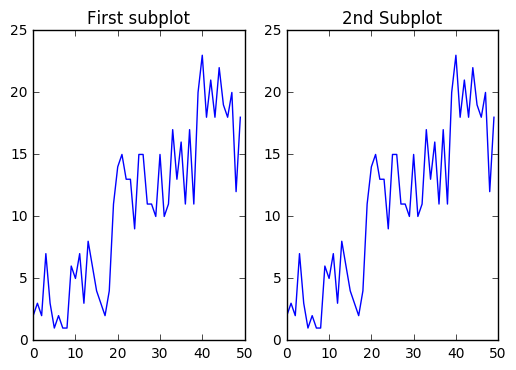

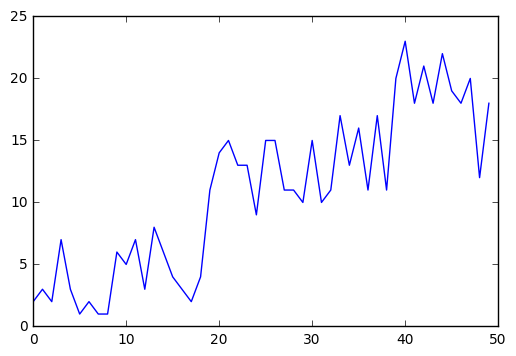

In [19]:
# Invoke the 1st figure
plt.figure(1)

# Go to that second subplot
plt.subplot(1, 2, 2)

# Change the title
plt.title('2nd Subplot')

# Show everything
plt.show()

This is a Jupyter thing... IPython [clears the figure automatically](http://stackoverflow.com/questions/31441247/how-to-keep-the-current-figure-when-using-ipython-notebook-with-matplotlib-inli).

Otherwise, that switching between figures should work.

You can also control the **size** and **resolution** of figures:

```python
plt.figure(figsize=(10, 8), dpi=200)
```

And you can manage the **margins** between plots and the image edge:

```python
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.99, top=0.99)
```

This leaves a

* 10% margin on the left side,
* 20% margin on the bottom,
* 1% margin for top, and
* 1% margin for right edge.

### Styles

#### Colors

You can use the **`color` keyword** to change the **line color**:

```python
plt.plot(plot_data, color='r')
```

Available color shortcuts are listed below.

| **Code** | **Color** |
| :-- | :-- |
| b | blue |
| g | green |
| r | red |
| c | cyan |
| m | magenta |
| y | yellow |
| k | black |
| w | white |

You can also specify **hexadecimal** values:

```python
plt.plot(plot_data, color='#aa5599')
```

or RGB ratios:

```python
plt.plot(plot_data, color=(0.1, 0.9, 0.6))
```

#### Lines

You can also change the **line width**:

```python
plt.plot(plot_data, linewidth=3)
```

Or the **line style**:

```python
plt.plot(plot_data, 'o') # 'o' means "dots"

plt.plot(plot_data, linestyle='--') # '--' means "dashed"
```

Some possibilities:

| **Value** | **Style** |
| :-- | :-- |
| `'-'` | solid line (default) |
| `'--'` | dashed line |
| `'-.'` | dash-dot line |
| `':'` | dotted line |

Or use **markers** for **point-like** data, like **scatter plots**:

```python
plt.plot(plot_data, marker='s')
```

Some possibilities:

| **Marker** | **Meaning** |
| :-- | :-- |
| `'.'` | point |
| `'o'` | circle |
| `'v'` | triangle down |
| `'^'` | triangle up |
| `'s'` | square |
| `'p'` | pentagon |
| `'*'` | star |
| `'h'` | hexagon |
| `'+'` | plus |
| `'D'` | diamond |

## Configuring Axes

### Range

We can change the **limits** on the **`x`**- and **`y`**-axes.

```python
plt.xlim(-10, 15)
```

### Scaling

We can use a **logarithmic scale** on the axes:


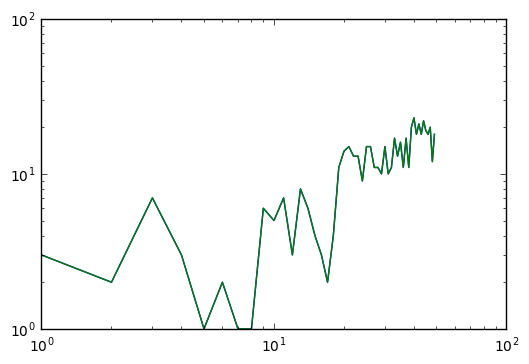

In [21]:
plt.loglog(plot_data)
plt.show()

Available options:

| **Method** | **Result** |
| :-- | :-- |
| `plt.semilogx` | logarithmic scaling on X-axis |
| `plt.semilogy` | logarithmic scaling on Y-axis |
| `plt.loglog` | logarithmic scaling on both axes (log-log plot) |

### Two Independent `x`- & `y`-Axes

We can put different graphs on the same plot, where the axes function differently for each graph.  In the following we have two graphs with a **shared `x`-axis** but **different `y`-axes**.

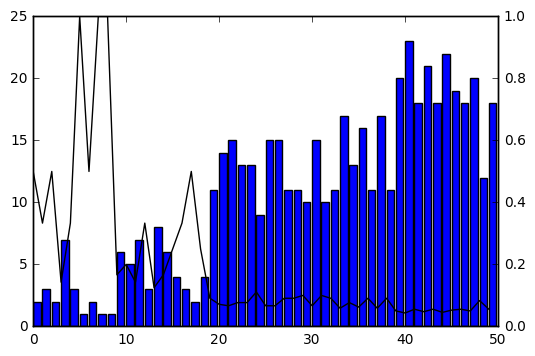

In [22]:
plt.bar(plot_data.index, plot_data.values)
plt.twinx()
plt.plot(1/ plot_data, color='k')
plt.show()

## Plot Descriptions

A **good plot** should have **enough descriptive information** that the viewer understands **what it represents**.

### Labels

**Note to self:** the lesson doesn't say **what a plot label does**.

We can create plots with **labels**.

**Use:** this can be used in a **legend** for **distinguishing** between graphs.

For example,

```python
plt.plot(..., label='some description')
```

You can then **create a legend** (and ask `matplotlib` to put it in the **`'best'`** location in the figure.

```python
plt.legend(loc='best')
```

### Ticks

You can change the **locations** and **lables** of ticks on the axes.

For example:

```python
# put ticks in given locations of X-axis
plt.xticks([1,2,3,4])

# put ticks in given locations on Y-axis, denote them with letters
plt.yticks([1,2,3], ['A', 'B', 'C'])
```

You can also:

* **rotate** ticks: `rotation=angle_in_degrees`;
* add **grid lines** at ticks: `plt.grid()`.

### Labels

You can **label** the **axes**:

```python
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
```

And you can give the plot a **title**:

```python
plt.title('Plot title')
```

## Variations

You can create different **plot types**, like a **bar plot**.

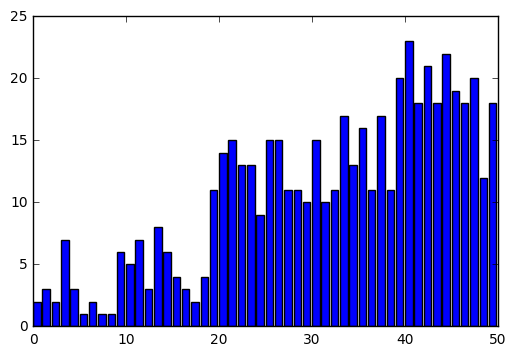

In [23]:
plt.bar(plot_data.index, plot_data.values)
plt.show()

Some basic types:

| **Command** | **Type** |
| :-- | :-- |
| `plt.bar` | bar |
| `plt.contour` | contour |
| `plt.pie` | pie chart |
| `plt.errorbar` | error bars |
| `plt.polar` | polar |

## Explore

There's a lot more to [`matplotlib`](http://matplotlib.org/).  Look here:

* [`matplotlib` gallery](http://matplotlib.org/gallery.html),
* [SciPy Cookbook](http://wiki.scipy.org/Cookbook/Matplotlib).

An example box-and-whisker plot.

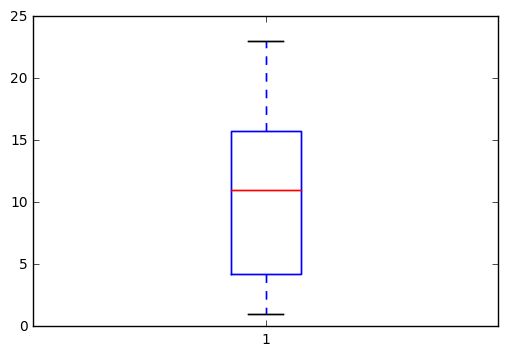

In [25]:
plt.boxplot(plot_data.values)
plt.show()

## Realistic Example

Let's try grouping **plot** values by **sex**.

In [26]:
grouped_plot_data = small_dataset.groupby('sex')

This returns an **iterable** that looks something like this:

```python
('group_name', pandas data pertaining to the group)
```

We can

* **loop** through this and
* **adjust** the color and label for **each group**.

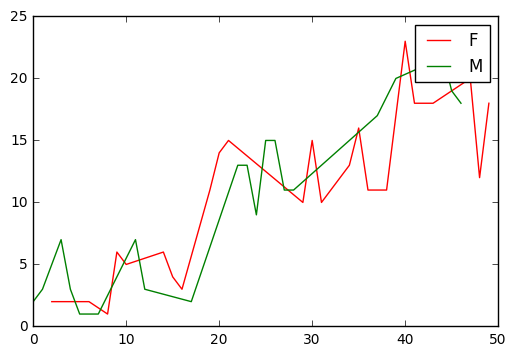

In [27]:
colors = ['r', 'g'] #we'll be cycling through these colors
color_index = 0
for group in grouped_plot_data:
    color = colors[color_index]
    group_label = group[0]
    group_data = group[1]
    plt.plot(group_data['plot_id'], color=color, label=group_label)
    color_index += 1
plt.legend()
plt.show()